<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/CAPM_Capital_Asset_Pricing_Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPM - Capital Asset Pricing Model 

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import statsmodels.api as sm   
import datetime as dt

# we import the following libraries to handle the download of data from French's website
import urllib.request       # this package helps handle online files
import zipfile              # this package is a Zip file utility to extract zipped files
import os                   # this package helps us delete the files after usage

import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from pylab import mpl, plt

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams["savefig.dpi"] = 500
np.set_printoptions(precision=5, suppress=True, formatter={"float": lambda x: f"{x:6.3f}"})

%matplotlib inline

In [3]:
#help(stats.linregress)

In [49]:
def get_prices(tickers, freq_p, st_day, end_day):
    mystock = pd.DataFrame()
    for t in tickers:
        mystock[t] = yf.download(t, start=st_day, end=end_day, interval=freq_p)['Adj Close']
    
    return mystock

In [51]:
tic=['WMT', 'SPY']
prices= get_prices(tic, freq_p='1wk', st_day="2011-01-01", end_day="2022-05-31")  # id , 1wk, 1mo
print(prices)

prices.rename(columns={"WMT": "Your_Stock", "SPY":"INDEX"}, inplace=True)

prices.info()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                   WMT         SPY
Date                              
2011-01-01   41.478462  102.504013
2011-01-08   42.038361  104.245453
2011-01-15   42.743969  103.495628
2011-01-22   43.487957  102.971596
2011-01-29   42.974072  105.736984
...                ...         ...
2022-04-30  149.018326  411.339996
2022-05-05         NaN         NaN
2022-05-07  148.050003  401.720001
2022-05-14  119.199997  389.630005
2022-05-23  122.599998  396.920013

[641 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 641 entries, 2011-01-01 to 2022-05-23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Your_Stock  595 non-null    float64
 1   INDEX       595 non-null    float64
dtypes: float64(2)
memory usage: 15.0 KB


In [6]:
print(prices.isnull().sum())
prices.dropna(how='any', inplace=True)
print(prices.isnull().sum())
prices.info()

Your_Stock    46
INDEX         46
dtype: int64
Your_Stock    0
INDEX         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 595 entries, 2011-01-01 to 2022-05-23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Your_Stock  595 non-null    float64
 1   INDEX       595 non-null    float64
dtypes: float64(2)
memory usage: 13.9 KB


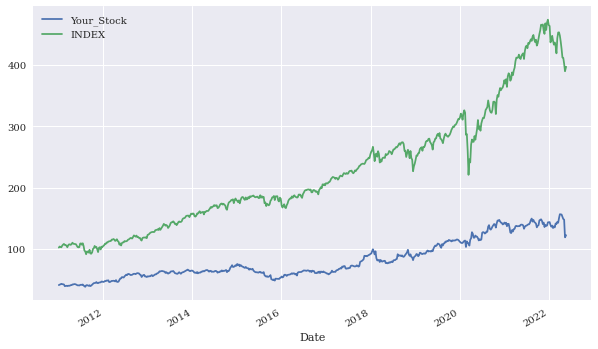

In [7]:
prices.plot(figsize=(10,6))
plt.legend()

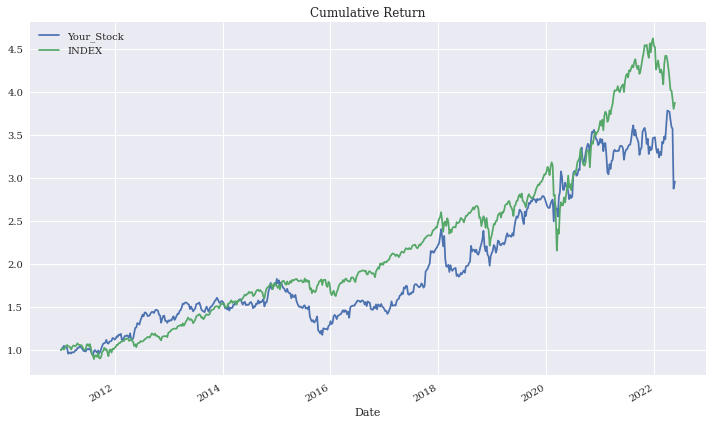

In [8]:
(prices / prices.iloc[0] * 1).plot(figsize=(10, 6), subplots=False)  #cumulative returns
plt.title('Cumulative Return')
plt.tight_layout()

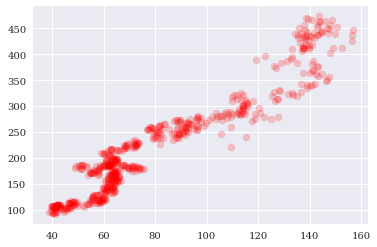

In [9]:
prices.pct_change(1).dropna()
plt.scatter(prices['Your_Stock'], prices['INDEX'], color = 'red', alpha=0.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e9c965cd0>,
      dtype=object)

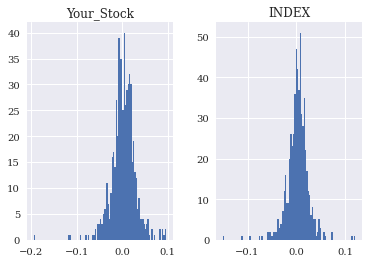

In [10]:
returns = prices.pct_change(1).dropna()
returns.hist(bins=100)

In [11]:
returns

,Your_Stock,INDEX
Date,,
2011-01-08,0.013499,0.016989
2011-01-15,0.016785,-0.007193
2011-01-22,0.017405,-0.005064
2011-01-29,-0.011816,0.026855
2011-02-05,-0.006068,0.014945
...,...,...
2022-04-23,-0.024672,-0.032955
2022-04-30,-0.022420,-0.001602
2022-05-07,-0.006498,-0.023387


In [12]:
beta,alpha,r_value,p_value,std_err = stats.linregress(returns['INDEX'],returns["Your_Stock"])

In [13]:
print(beta.round(4))
print(alpha.round(4))
print(r_value.round(2))
print(p_value.round(4))

0.4544
0.001
0.38
0.0


In [14]:
formula = 'Your_Stock ~ INDEX'
results = smf.ols(formula, returns).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Your_Stock   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     98.16
Date:                Mon, 23 May 2022   Prob (F-statistic):           1.63e-21
Time:                        23:14:17   Log-Likelihood:                 1352.8
No. Observations:                 594   AIC:                            -2702.
Df Residuals:                     592   BIC:                            -2693.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0010      0.001      1.013      0.3

You need to take a look at the shape of the data you are feeding into .fit().

Here x.shape = (10,) but we need it to be (10, 1), see sklearn. Same goes for y. So we reshape:

In [15]:
X = returns.loc[:, ['INDEX']].values

In [16]:
y = returns.loc[:, ['Your_Stock']].values

In [17]:
X.shape

(594, 1)

In [18]:
type(X)

numpy.ndarray

In [19]:
X.dtype

dtype('float64')

In [20]:
y.shape
y

array([[ 0.013],
       [ 0.017],
       [ 0.017],
       [-0.012],
       [-0.006],
       [-0.006],
       [-0.066],
       [ 0.006],
       [ 0.010],
       [-0.013],
       [ 0.016],
       [-0.004],
       [ 0.008],
       [ 0.019],
       [ 0.001],
       [ 0.026],
       [ 0.001],
       [ 0.013],
       [-0.001],
       [-0.011],
       [-0.019],
       [-0.018],
       [ 0.002],
       [-0.008],
       [ 0.021],
       [ 0.011],
       [-0.008],
       [ 0.017],
       [-0.033],
       [-0.035],
       [-0.022],
       [ 0.059],
       [ 0.011],
       [-0.016],
       [-0.013],
       [ 0.025],
       [-0.035],
       [ 0.022],
       [ 0.035],
       [ 0.033],
       [ 0.026],
       [ 0.004],
       [ 0.006],
       [ 0.030],
       [-0.033],
       [-0.006],
       [ 0.021],
       [ 0.004],
       [ 0.005],
       [ 0.030],
       [-0.004],
       [-0.013],
       [ 0.009],
       [ 0.025],
       [-0.005],
       [ 0.022],
       [-0.002],
       [ 0.009],
       [-0.059

In [21]:
reg = LinearRegression(fit_intercept=True).fit(X,y)

In [22]:
reg.predict(X[0].reshape(-1,1))

array([[ 0.009]])

In [23]:
reg.predict(X[0:10])

array([[ 0.009],
       [-0.002],
       [-0.001],
       [ 0.013],
       [ 0.008],
       [ 0.006],
       [-0.006],
       [ 0.002],
       [-0.005],
       [-0.010]])

In [24]:
score = reg.score(X, y)
print(score)

0.1422268368953048


In [25]:
reg.coef_

array([[ 0.454]])

In [26]:
reg.intercept_

array([ 0.001])

In [27]:
m = reg.coef_[0,0]
b = reg.intercept_[0]

In [28]:
m

0.4543587312730403

In [29]:
b

0.0010400783758980243

In [30]:
# following slope intercept form 
print("formula: y = {:.4f}X + {:.4f}".format(m, b) )

formula: y = 0.4544X + 0.0010


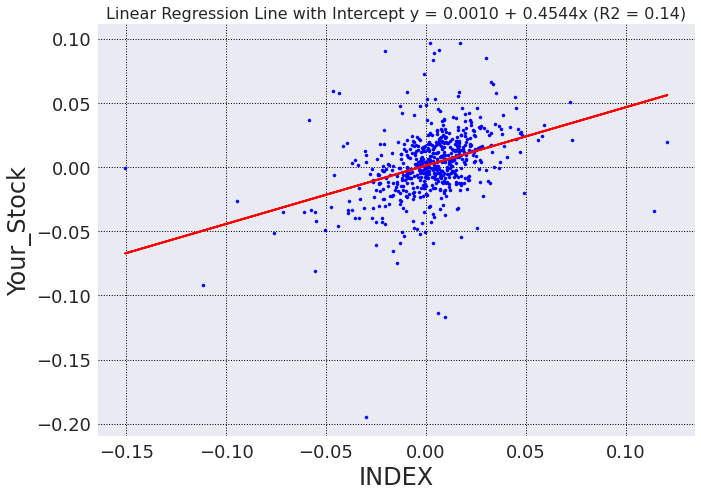

In [35]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='blue', s=10);
ax.plot(X, reg.predict(X), color='red',linewidth=2);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('INDEX', fontsize = 24)
ax.set_ylabel('Your_Stock', fontsize = 24)
ax.set_title("Linear Regression Line with Intercept y = {:.4f} + {:.4f}x (R2 = {:.2f})".format(b, m, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)